# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import requests

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define your API key
weather_api_key = "27a295e6d71fd1e97155945bea4fe90e"

# Define your list of cities with their names and optional state and country codes
cities = [
    {"name": "London", "country": "GB"},
    {"name": "New York", "country": "US"},
    # Add more cities with their names, state codes (if applicable), and country codes as needed
]

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with city name, state code, and country code
    city_url = f"{url}q={city['name']},{city.get('state', '')},{city['country']}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city['name']))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send GET request to the API
        response = requests.get(city_url)
        
        # Check if the response is successful
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Extract relevant weather data
            city_name = city_weather["name"]
            city_lat = city_weather["coord"]["lat"]
            city_lon = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind_speed = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({
                "City": city_name, 
                "Lat": city_lat, 
                "Lon": city_lon, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind_speed,
                "Country": city_country,
                "Date": city_date
            })
        else:
            print(f"Failed to fetch data for {city['name']}. Status Code: {response.status_code}")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"Error occurred while processing {city['name']}: {e}")

# Indicate that Data Retrieval is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | London
Processing Record 2 of Set 1 | New York
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
import requests
import numpy as np
from citipy import citipy

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define your API key
weather_api_key = "27a295e6d71fd1e97155945bea4fe90e"

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with city name and country code
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send GET request to the API
        response = requests.get(city_url)
        
        # Check if the response is successful
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Extract relevant weather data
            city_name = city_weather["name"]
            city_lat = city_weather["coord"]["lat"]
            city_lon = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind_speed = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({
                "City": city_name, 
                "Lat": city_lat, 
                "Lon": city_lon, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind_speed,
                "Country": city_country,
                "Date": city_date
            })
        else:
            print(f"Failed to fetch data for {city}. Status Code: {response.status_code}")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"Error occurred while processing {city}: {e}")

# Indicate that Data Retrieval is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Number of cities in the list: 597
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | minas de marcona
Processing Record 6 of Set 1 | funafuti
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | la passe
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | tura
Processing Record 13 of Set 1 | bamboo flat
Processing Record 14 of Set 1 | atafu village
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | colby
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | daru
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | santo antonio do ica
Processing Record 22 of S

In [5]:
import pandas as pd

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          578
Lat           578
Lon           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,College,64.8569,-147.8028,287.84,43,75,3.60,US,1715208725
1,Bilibino,68.0546,166.4372,272.85,80,95,0.97,RU,1715208725
2,Thompson,55.7435,-97.8558,288.24,33,75,1.54,CA,1715208717
3,Albany,42.6001,-73.9662,295.51,53,0,6.71,US,1715208726
4,Minas de Marcona,-15.2119,-75.1103,287.72,87,83,6.85,PE,1715208727


In [8]:
import os

# Check if the directory exists, if not, create it
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv(f"{output_dir}/cities.csv", index_label="City_ID")


In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,College,64.8569,-147.8028,287.84,43,75,3.60,US,1715208725
1,Bilibino,68.0546,166.4372,272.85,80,95,0.97,RU,1715208725
2,Thompson,55.7435,-97.8558,288.24,33,75,1.54,CA,1715208717
3,Albany,42.6001,-73.9662,295.51,53,0,6.71,US,1715208726
4,Minas de Marcona,-15.2119,-75.1103,287.72,87,83,6.85,PE,1715208727


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

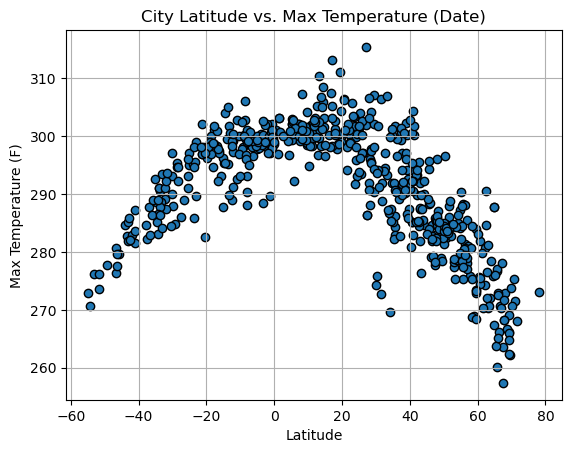

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

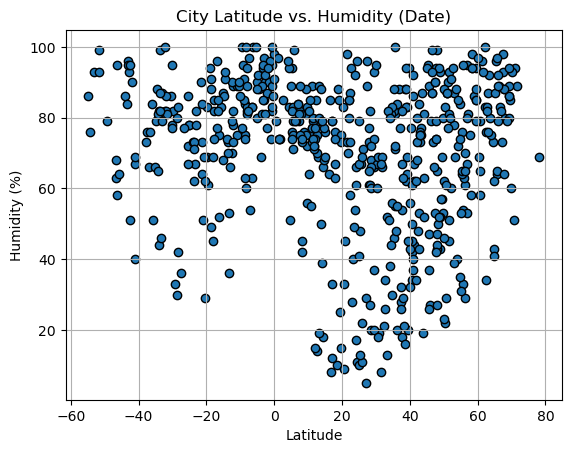

In [11]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

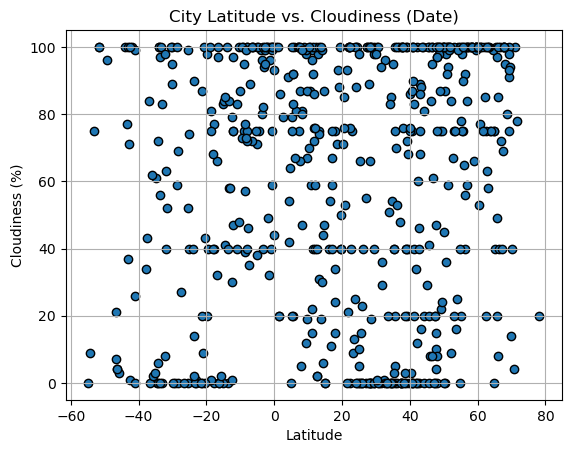

In [12]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

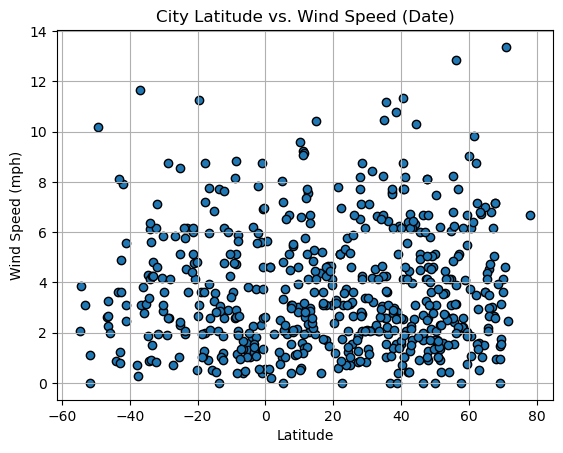

In [13]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate linear regression equation and r-squared value
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(f"R-squared: {round(rvalue**2, 2)}", (text_coordinates[0], text_coordinates[1]-10), fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"City Latitude vs. {title}")
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show plot
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,College,64.8569,-147.8028,287.84,43,75,3.60,US,1715208725
1,Bilibino,68.0546,166.4372,272.85,80,95,0.97,RU,1715208725
2,Thompson,55.7435,-97.8558,288.24,33,75,1.54,CA,1715208717
3,Albany,42.6001,-73.9662,295.51,53,0,6.71,US,1715208726
7,Hasaki,35.7333,140.8333,284.37,81,100,11.19,JP,1715208728


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,Minas de Marcona,-15.2119,-75.1103,287.72,87,83,6.85,PE,1715208727
5,Funafuti,-8.5243,179.1942,306.15,75,75,5.14,TV,1715208727
6,Bredasdorp,-34.5322,20.0403,285.17,88,0,1.86,ZA,1715208727
10,West Island,-12.1568,96.8225,299.14,89,75,6.17,CC,1715208729
13,Atafu Village,-8.5421,-172.5159,302.75,74,57,4.74,TK,1715208730


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7184182237818209


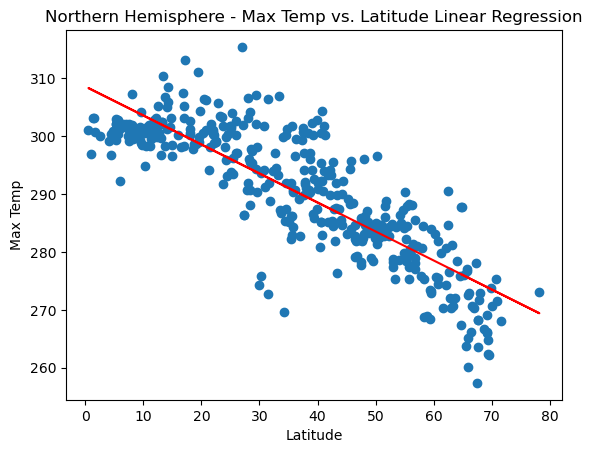

In [17]:
# Linear regression on Northern Hemisphere
# Importing necessary library
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot and regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # Label plot
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.title(f'Northern Hemisphere - {title} vs. Latitude Linear Regression')
    
    # Print r square value
    print(f"The r-squared is: {r_value**2}")
    
    # Show plot
    plt.show()

# Call the function for Temperature vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Max Temp', (0, 0))


The r-squared is: 0.688161128088459


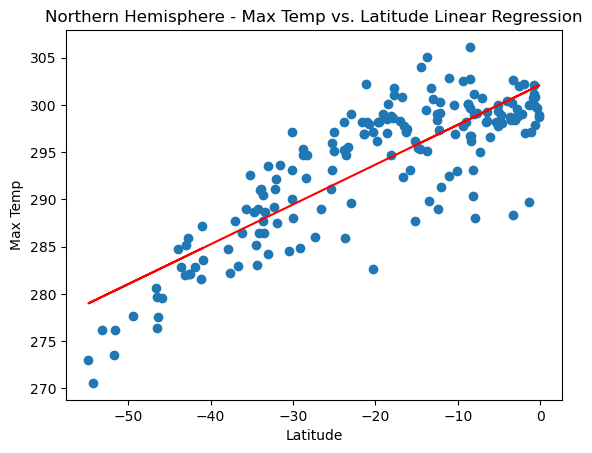

In [18]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Max Temp', (-50, 90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.009893381102843612


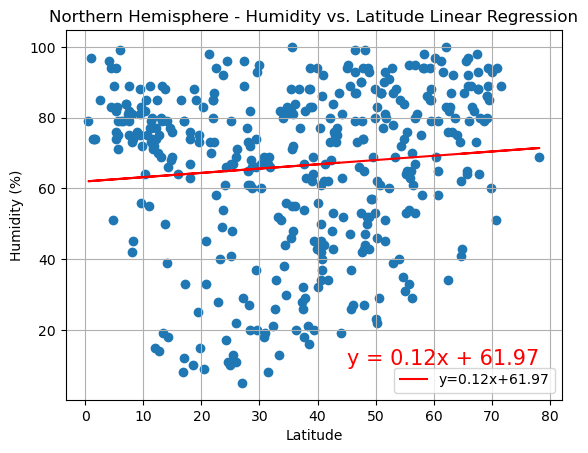

In [25]:
# Northern Hemisphere
x_values_northern_humidity = northern_hemi_df["Lat"]
y_values_northern_humidity = northern_hemi_df["Humidity"]

# Perform linear regression
(slope_northern_humidity, intercept_northern_humidity, rvalue_northern_humidity, pvalue_northern_humidity, stderr_northern_humidity) = linregress(x_values_northern_humidity, y_values_northern_humidity)

# Get regression values
regress_values_northern_humidity = x_values_northern_humidity * slope_northern_humidity + intercept_northern_humidity

# Create line equation string
line_eq_northern_humidity = "y = " + str(round(slope_northern_humidity,2)) + "x + " + str(round(intercept_northern_humidity,2))

# Create plot
plt.scatter(x_values_northern_humidity, y_values_northern_humidity)
plt.plot(x_values_northern_humidity, regress_values_northern_humidity, "r-", label='y={:.2f}x+{:.2f}'.format(slope_northern_humidity,intercept_northern_humidity))
plt.annotate(line_eq_northern_humidity,(45,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue_northern_humidity**2}")

# Show plot
plt.legend()
plt.grid()
plt.show()


The r-value is: 0.042207244823115095


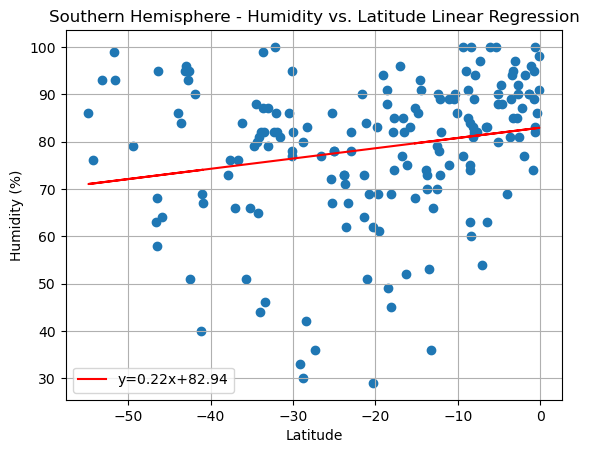

In [26]:
# Southern Hemisphere
x_values_southern_humidity = southern_hemi_df["Lat"]
y_values_southern_humidity = southern_hemi_df["Humidity"]

# Perform linear regression
(slope_southern_humidity, intercept_southern_humidity, rvalue_southern_humidity, pvalue_southern_humidity, stderr_southern_humidity) = linregress(x_values_southern_humidity, y_values_southern_humidity)

# Get regression values
regress_values_southern_humidity = x_values_southern_humidity * slope_southern_humidity + intercept_southern_humidity

# Create line equation string
line_eq_southern_humidity = "y = " + str(round(slope_southern_humidity,2)) + "x + " + str(round(intercept_southern_humidity,2))

# Create plot
plt.scatter(x_values_southern_humidity, y_values_southern_humidity)
plt.plot(x_values_southern_humidity, regress_values_southern_humidity, "r-", label='y={:.2f}x+{:.2f}'.format(slope_southern_humidity,intercept_southern_humidity))
plt.annotate(line_eq_southern_humidity,(-50,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue_southern_humidity**2}")

# Show plot
plt.legend()
plt.grid()
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.013629442138900801


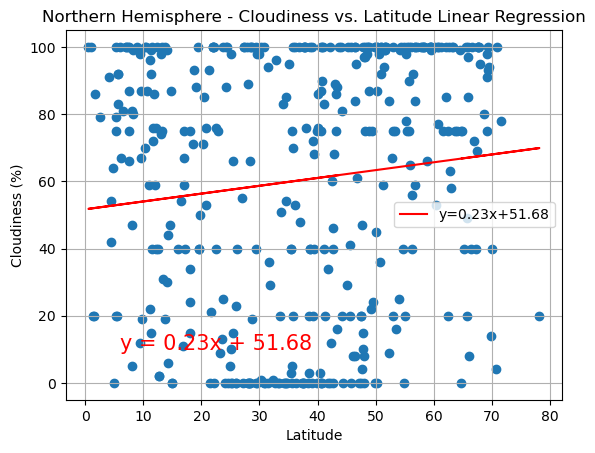

In [27]:
# Northern Hemisphere
x_values_northern_cloudiness = northern_hemi_df["Lat"]
y_values_northern_cloudiness = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope_northern_cloudiness, intercept_northern_cloudiness, rvalue_northern_cloudiness, pvalue_northern_cloudiness, stderr_northern_cloudiness) = linregress(x_values_northern_cloudiness, y_values_northern_cloudiness)

# Get regression values
regress_values_northern_cloudiness = x_values_northern_cloudiness * slope_northern_cloudiness + intercept_northern_cloudiness

# Create line equation string
line_eq_northern_cloudiness = "y = " + str(round(slope_northern_cloudiness,2)) + "x + " + str(round(intercept_northern_cloudiness,2))

# Create plot
plt.scatter(x_values_northern_cloudiness, y_values_northern_cloudiness)
plt.plot(x_values_northern_cloudiness, regress_values_northern_cloudiness, "r-", label='y={:.2f}x+{:.2f}'.format(slope_northern_cloudiness,intercept_northern_cloudiness))
plt.annotate(line_eq_northern_cloudiness,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue_northern_cloudiness**2}")

# Show plot
plt.legend()
plt.grid()
plt.show()

The r-value is: 0.0950919151569825


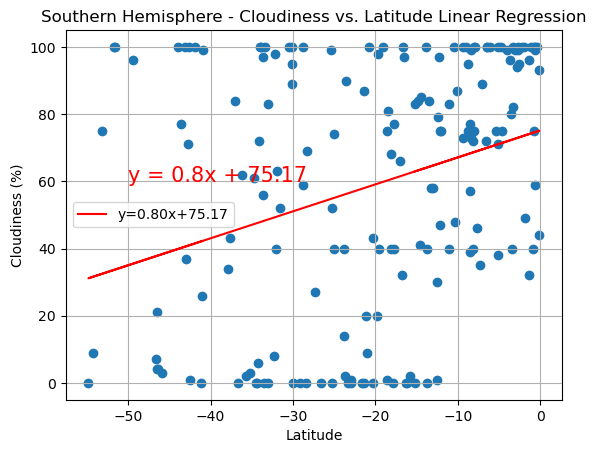

In [22]:
# Southern Hemisphere
x_values_southern_cloudiness = southern_hemi_df["Lat"]
y_values_southern_cloudiness = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope_southern_cloudiness, intercept_southern_cloudiness, rvalue_southern_cloudiness, pvalue_southern_cloudiness, stderr_southern_cloudiness) = linregress(x_values_southern_cloudiness, y_values_southern_cloudiness)

# Get regression values
regress_values_southern_cloudiness = x_values_southern_cloudiness * slope_southern_cloudiness + intercept_southern_cloudiness

# Create line equation string
line_eq_southern_cloudiness = "y = " + str(round(slope_southern_cloudiness,2)) + "x + " + str(round(intercept_southern_cloudiness,2))

# Create plot
plt.scatter(x_values_southern_cloudiness, y_values_southern_cloudiness)
plt.plot(x_values_southern_cloudiness, regress_values_southern_cloudiness, "r-", label='y={:.2f}x+{:.2f}'.format(slope_southern_cloudiness,intercept_southern_cloudiness))
plt.annotate(line_eq_southern_cloudiness,(-50,60),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue_southern_cloudiness**2}")

# Show plot
plt.legend()
plt.grid()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0013632504893763204


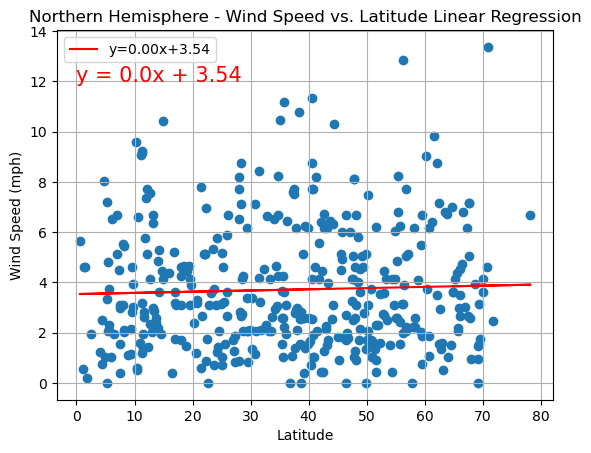

In [23]:
# Northern Hemisphere
x_values_northern_wind = northern_hemi_df["Lat"]
y_values_northern_wind = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope_northern_wind, intercept_northern_wind, rvalue_northern_wind, pvalue_northern_wind, stderr_northern_wind) = linregress(x_values_northern_wind, y_values_northern_wind)

# Get regression values
regress_values_northern_wind = x_values_northern_wind * slope_northern_wind + intercept_northern_wind

# Create line equation string
line_eq_northern_wind = "y = " + str(round(slope_northern_wind,2)) + "x + " + str(round(intercept_northern_wind,2))

# Create plot
plt.scatter(x_values_northern_wind, y_values_northern_wind)
plt.plot(x_values_northern_wind, regress_values_northern_wind, "r-", label='y={:.2f}x+{:.2f}'.format(slope_northern_wind,intercept_northern_wind))
plt.annotate(line_eq_northern_wind,(0,12),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue_northern_wind**2}")

# Show plot
plt.legend()
plt.grid()
plt.show()

The r-value is: 0.003945344208042967


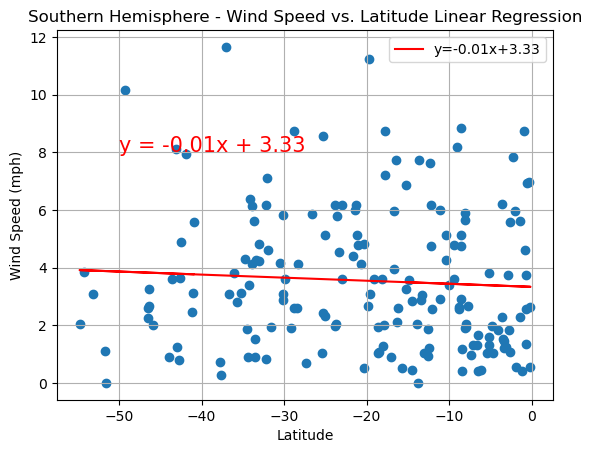

In [24]:
# Southern Hemisphere
x_values_southern_wind = southern_hemi_df["Lat"]
y_values_southern_wind = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope_southern_wind, intercept_southern_wind, rvalue_southern_wind, pvalue_southern_wind, stderr_southern_wind) = linregress(x_values_southern_wind, y_values_southern_wind)

# Get regression values
regress_values_southern_wind = x_values_southern_wind * slope_southern_wind + intercept_southern_wind

# Create line equation string
line_eq_southern_wind = "y = " + str(round(slope_southern_wind,2)) + "x + " + str(round(intercept_southern_wind,2))

# Create plot
plt.scatter(x_values_southern_wind, y_values_southern_wind)
plt.plot(x_values_southern_wind, regress_values_southern_wind, "r-", label='y={:.2f}x+{:.2f}'.format(slope_southern_wind,intercept_southern_wind))
plt.annotate(line_eq_southern_wind,(-50,8),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue_southern_wind**2}")

# Show plot
plt.legend()
plt.grid()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#it only seems to be a correlation between temperature and lattitude in both south and north 